# Exploratory Data Analysis: COVID-19

In this notebook, we perform a self expertimentation of Exploratory Data Analysis(EDA) of Denmark's COVID-19 cases.

### 1. Identify business problem

The first step to Exploratory Data Analysis (EDA) is to identify the business problem. The business case revolves around the understanding of the use of data to prevent spread of COVID-19 virus in Denmark. The aim is to analyze the data and compare against the decisions made and enforced by the officials and the health experts. This EDA is not a solution to the problem but the ambition is to understand if gathering factual data aided in effective decision making by the authorities. 

### 2. Data collection

The data used in this analysis is collected from [Statistibanken](https://www.statistikbanken.dk/SMIT1), which is a public database maintained, and made available by [Danmarks Statistik](https://www.dst.dk/) --- the central statistics office in Denmark under the Ministry of Economy. The data consists of official records of total people tested, infections, deaths and admission to hospital to among other key figures. The data was collected starting from March 21, 2020, which gets updated daily.

### 3. Data preparation

The data from Statistikbanken is made available in multiple formats so people can choose how they want the data, for example: an Excel sheet or a plain text file. For this analaysis, we chose to use the data as a CSV (comma-separated value) file for ease of use. In the following steps, we will go through the process of tidying data and preparing it for the analysis.

// _As its default form, the data could not be used out of the box as it needed some tidying up as we needed. To list out the issues of the raw data:
a._

#### 3.1 Load the data into R and inspect

The first step is to load the raw data into R and inspect if it is workable and understandable. If not, we must proceed to transform the data. Without a clear understanding of data, the anaylsis is pointless.

In [1]:
list.files(".")

[1] "COVID-data-raw.csv"         "COVID-data-transformed.csv"
[3] "EDA-COVID.ipynb"

In [2]:
RawCovidData <- read.csv("COVID-data-raw.csv", encoding="UTF-8")

In [3]:
head(RawCovidData)

X.,M03D21,M03D22,M03D23,M03D24,M03D25,M03D26,M03D27,M03D28,M03D29,...,M11D22,M11D23,M11D24,M11D25,M11D26,M11D27,M11D28,M11D29,M11D30,M12D01
Bekræftede COVID-19 tilfælde (Total),1326,1395,1450,1577,1715,1851,2010,2201,2395,...,70485,71654,73021,74204,75395,76718,78354,79352,80481,81949
Overstået COVID-19 infektion (Total),..,..,..,..,..,..,..,..,..,...,55274,56032,57075,58148,59250,60312,61461,62514,63515,64757
Antal testede for COVID-19 (Total),11657,12351,12843,13756,14870,15981,17275,18810,20198,...,3289511,3308512,3329222,3346932,3364827,3383120,3404692,3418006,3432519,3448151
Dødsfald med COVID-19 (Total),22,25,31,37,43,55,67,76,84,...,795,798,804,812,816,824,830,841,846,846
Dødsfald med COVID-19 pr. dag,3,3,6,6,6,12,12,9,8,...,6,3,6,8,4,8,6,11,5,0
Indlagte på sygehusene ifm. COVID-19,206,232,254,301,350,386,430,459,499,...,254,261,255,251,244,254,249,256,259,254


#### 3.2 Initial inspection feedback

We loaded the data into R and print the first few rows of data for inspection. Immediately, we can come to a conclusion that data transformation is needed. The number of transformation required is subjective, which could be based on the requirements,  people responsible for data analysis and target audience, among many others. As for our need, we came up with a list of transformations required: 
1. The key indicators are in Danish, should be translated to English as the target audience is global.
2. The timeline is horizontal, should be transposed such that the timeline is vertical and the key indicators are the first values of the columns.
3. The date is recorded as `MxxDxx`, should be transformed to ISO 8601 date format `yyyy-mm-dd` as it is the international standard.
4. The missing values are noted as `..`, should be replaced with `NA` as that is what R understands as missing values.

#### 3.3 Data transformation

After realization of the need of data transformation, we continue to do so in this step. As the dataset is not very large, we used Google Sheets (an alternative to Microsoft Excel) to transfrom the data, as it provided all the necessary tools out of the box.

We proceeded to tackle the issues in the same order as listed above.

Firstly, the task to translate the key indicators for Danish to English was simple enough, with the help of technology and native Danish speakers to verify.

The next step was to transpose, or rotate, the data from rows to columns. This helped to adjust the timeline from being horizontal to vertical. Additionally, this step moved the key indicators to be inital values of the columns, just as we needed it to be.

The third step was tedious for manual transformation. The goal was to transform data from `M03D21` to `2020-03-21`. Since the original value was fairly organised, i.e. "`M`(month index)`D`(date index)", we could harness the power of formulas to transform the data. To do so was a 2-step process. Replacing `M` with `2020-` and replacing `D` with `-` in 2 separate columns with the `=REPLACE(text, position, length, new_text)` function.

The final step was to `Find and Replace` the data `..` to `NA`.

The file `COVID-data-transformed.csv` steps was the output of this data transformation.

In [4]:
list.files(".")

[1] "COVID-data-raw.csv"         "COVID-data-transformed.csv"
[3] "EDA-COVID.ipynb"

In [5]:
TransformedCovidData <- read.csv("COVID-data-transformed.csv", encoding="UTF-8")

In [6]:
head(TransformedCovidData)

OriginalDate,ModDateAddYear,ISODate,ConfirmedTotalCases,TotalInfections,TotalNumberPeopleTested,TotalDeaths,DeathsPerDay,AdmittedToHospital,AdmittedToICU,PatientsInRespirator
M03D21,2020-03D21,2020-03-21,1326,NA,11657,22,3,206,42,35
M03D22,2020-03D22,2020-03-22,1395,NA,12351,25,3,232,46,40
M03D23,2020-03D23,2020-03-23,1450,NA,12843,31,6,254,55,47
M03D24,2020-03D24,2020-03-24,1577,NA,13756,37,6,301,59,58
M03D25,2020-03D25,2020-03-25,1715,NA,14870,43,6,350,87,76
M03D26,2020-03D26,2020-03-26,1851,NA,15981,55,12,386,94,78


#### 3.4 Verify and update data types

Here, we check the data types of the data loaded onto R. Since we load the data from a CSV file, R does not know what type of data certain inputs are. By default, it categorises unknown data types as `Factor` as they can store both strings and integers.
After inspecting the data types as understood by R, we need to update them, as necessary, to characters, date and integers.

In [7]:
str(TransformedCovidData)

'data.frame':	249 obs. of  11 variables:
 $ OriginalDate           : Factor w/ 249 levels "M03D21","M03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ModDateAddYear         : Factor w/ 249 levels "2020-03D21","2020-03D22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ISODate                : Factor w/ 249 levels "2020-03-21","2020-03-22",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ConfirmedTotalCases    : int  1326 1395 1450 1577 1715 1851 2010 2201 2395 2555 ...
 $ TotalInfections        : int  NA NA NA NA NA NA NA NA NA NA ...
 $ TotalNumberPeopleTested: int  11657 12351 12843 13756 14870 15981 17275 18810 20198 21378 ...
 $ TotalDeaths            : int  22 25 31 37 43 55 67 76 84 95 ...
 $ DeathsPerDay           : int  3 3 6 6 6 12 12 9 8 11 ...
 $ AdmittedToHospital     : int  206 232 254 301 350 386 430 459 499 533 ...
 $ AdmittedToICU          : int  42 46 55 59 87 94 109 121 131 137 ...
 $ PatientsInRespirator   : int  35 40 47 58 76 78 89 104 113 119 ...


In [8]:
library(lubridate) # library to help work with dates

TransformedCovidData$OriginalDate <- as.character(TransformedCovidData$OriginalDate)
TransformedCovidData$ModDateAddYear <- as.character(TransformedCovidData$ModDateAddYear)
TransformedCovidData$ISODate <- ymd(TransformedCovidData$ISODate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [9]:
str(TransformedCovidData)

'data.frame':	249 obs. of  11 variables:
 $ OriginalDate           : chr  "M03D21" "M03D22" "M03D23" "M03D24" ...
 $ ModDateAddYear         : chr  "2020-03D21" "2020-03D22" "2020-03D23" "2020-03D24" ...
 $ ISODate                : Date, format: "2020-03-21" "2020-03-22" ...
 $ ConfirmedTotalCases    : int  1326 1395 1450 1577 1715 1851 2010 2201 2395 2555 ...
 $ TotalInfections        : int  NA NA NA NA NA NA NA NA NA NA ...
 $ TotalNumberPeopleTested: int  11657 12351 12843 13756 14870 15981 17275 18810 20198 21378 ...
 $ TotalDeaths            : int  22 25 31 37 43 55 67 76 84 95 ...
 $ DeathsPerDay           : int  3 3 6 6 6 12 12 9 8 11 ...
 $ AdmittedToHospital     : int  206 232 254 301 350 386 430 459 499 533 ...
 $ AdmittedToICU          : int  42 46 55 59 87 94 109 121 131 137 ...
 $ PatientsInRespirator   : int  35 40 47 58 76 78 89 104 113 119 ...


### 4. Map data on graph

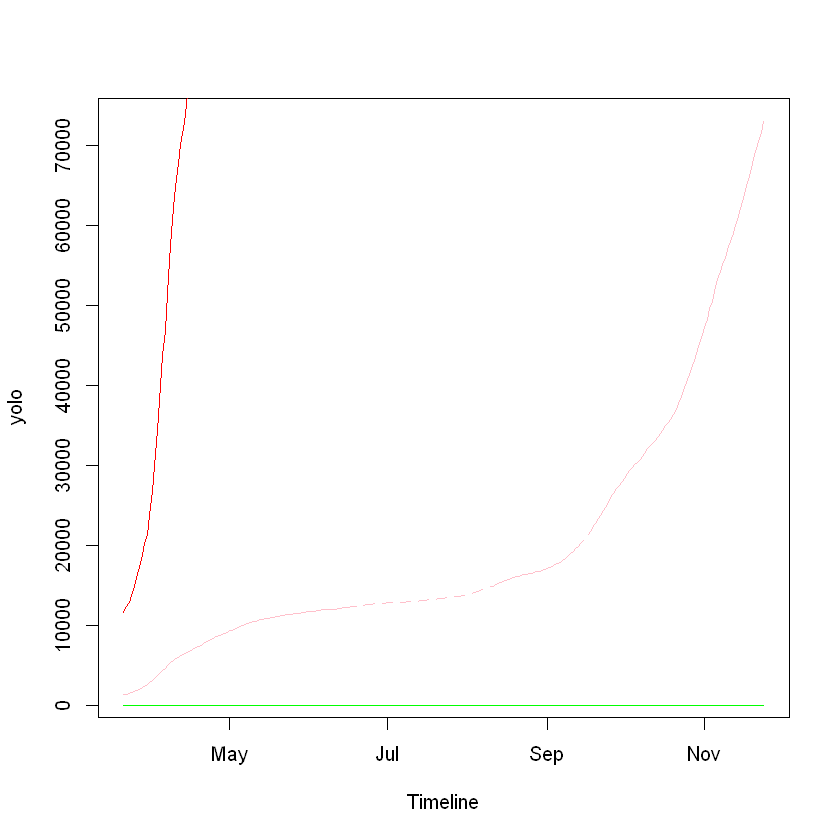

In [15]:
plot(TransformedCovidData$ISODate, TransformedCovidData$ConfirmedTotalCases, type = "l", col="pink", xlab = "Timeline", ylab = "yolo")                                 # Draw first line
lines(TransformedCovidData$ISODate, TransformedCovidData$TotalNumberPeopleTested, type = "l", col = "red")                   # Add second line
lines(TransformedCovidData$ISODate, TransformedCovidData$DeathsPerDay, type = "l", col = "green") 